# Title
Diabetes prediction using Machine Learning

# Meta data
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

# Import Libraries

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
import seaborn as sns
import plotly_express as px

# To ignore warning
import warnings
warnings.filterwarnings('ignore')

# For descriptive stats
import researchpy as rp
# For inferential stats
import scipy as sc

# For model development and prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


# Load dataset

In [2]:
df=pd.read_csv(r'C:\Users\sania.siddiqui\Downloads\diabetes (4).csv')

Read the dataset
- Shape of data
- Size of data
- Name of columns
- Structure type of data
- Descrriptive statistics of data


In [3]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
# Sape of data
df.shape, df.size

((768, 9), 6912)

In [5]:
# columns name in dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# General information regarding dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Structure of data
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# decriptive summary of data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Another way to run summary stats is by research py
rp.summary_cont(df).style.format(precision=2).background_gradient()

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Pregnancies,768.00,3.85,3.37,0.12,3.61,4.08
1,Glucose,768.00,120.89,31.97,1.15,118.63,123.16
2,BloodPressure,768.00,69.11,19.36,0.70,67.73,70.48
3,SkinThickness,768.00,20.54,15.95,0.58,19.41,21.67
4,Insulin,768.00,79.80,115.24,4.16,71.64,87.96
5,BMI,768.00,31.99,7.88,0.28,31.43,32.55
6,DiabetesPedigreeFunction,768.00,0.47,0.33,0.01,0.45,0.50
7,Age,768.00,33.24,11.76,0.42,32.41,34.07
8,Outcome,768.00,0.35,0.48,0.02,0.32,0.38


Data has 768 rows and 9 variables with one target (diabetes outcome while rest 8 are predictor variables)
-Target variable is 'outcome' with integers 0(indicating diabetes presence ) while 1 (indicating absence of diabetes)
- Predictor variables are Pregnancies indicating women with number of pregnancies
- Glucose indicating levels of glucose among women with and without diabetes
- Blood pressure, Skin Thickness, Insulin, BMI Diabetes Pedigree Function indicating measurements done among women with and without diabetes outcome
- Age as continous variable among women with mean age 33.24, SD11.76


# Exploratory Data Analysis

Visualize dataset
- Univariate 
- i for continous variables (make histogram for each variable to see spread and shape of variable)
- ii for categorical variable (make bar plot to see frequency counts)
- Bivariate
- i for continous variables (make histogram for each variable to see spread and shape of variable, box plot to visualize outliers)
- ii for categorical variables (make bar plot for each variable to see frequency counts aginst target variable)

In [10]:
# Split the dataset into two
# Filter dataset based on the outcome variable with 1 and zer0
DB_pos=df.loc[(df['Outcome']==0)]
DB_Neg=df.loc[(df['Outcome']==1)]

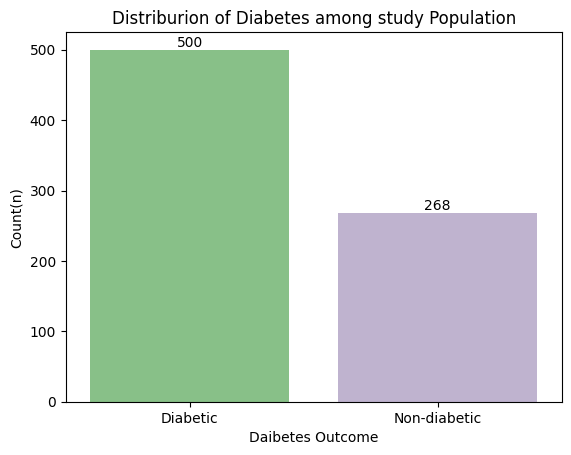

In [11]:
# Plot count of pregnancies, and outcome
p1=sns.countplot(data=df, x='Outcome', palette='Accent')
plt.xlabel('Daibetes Outcome')
plt.ylabel('Count(n)')
plt.title('Distriburion of Diabetes among study Population')
plt.xticks([0,1], ['Diabetic', 'Non-diabetic'])
for bar in p1.containers:
    p1.bar_label(bar)
plt.show()

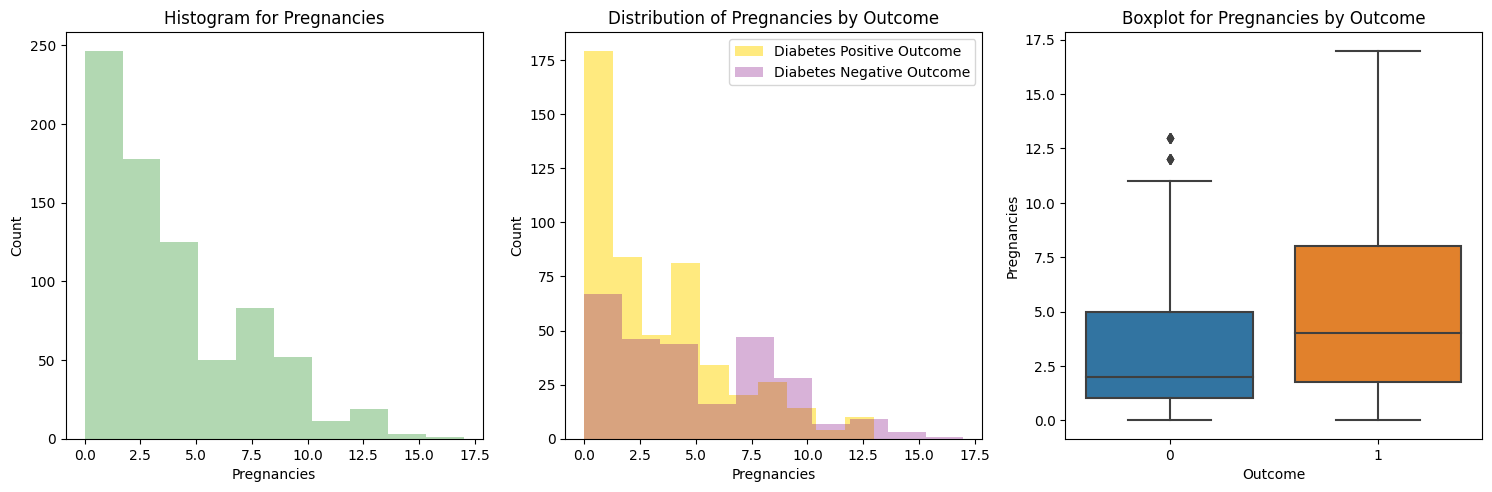

In [12]:
# Data Visualizatio for Pregnancies
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 1st for histogram
axs[0].hist(df['Pregnancies'], color='green', alpha=0.3)
axs[0].set_title('Histogram for Pregnancies')
axs[0].set_xlabel('Pregnancies')
axs[0].set_ylabel('Count')

# 2nd for histogram segmented by Outcome
axs[1].hist(df[df['Outcome'] == 0]['Pregnancies'], color='Gold', alpha=0.5,label='Diabetes Positive Outcome')
axs[1].hist(df[df['Outcome'] == 1]['Pregnancies'], color='purple', alpha=0.3, label='Diabetes Negative Outcome')
axs[1].set_title('Distribution of Pregnancies by Outcome')
axs[1].set_xlabel('Pregnancies')
axs[1].set_ylabel('Count')
axs[1].legend()

# 3rd for representing same segmentation using boxplot
sns.boxplot(data=df, y='Pregnancies', x='Outcome', ax=axs[2])
axs[2].set_title('Boxplot for Pregnancies by Outcome')
axs[2].set_xlabel('Outcome')
axs[2].set_ylabel('Pregnancies')

fig.tight_layout(pad=1.0)
plt.show()


- 1st graph show data right skewed
- 2nd graph shows high number of pregnant women frequencies are observe among diabetic positive groups
- 3rd Graph shows dats has come outliers 

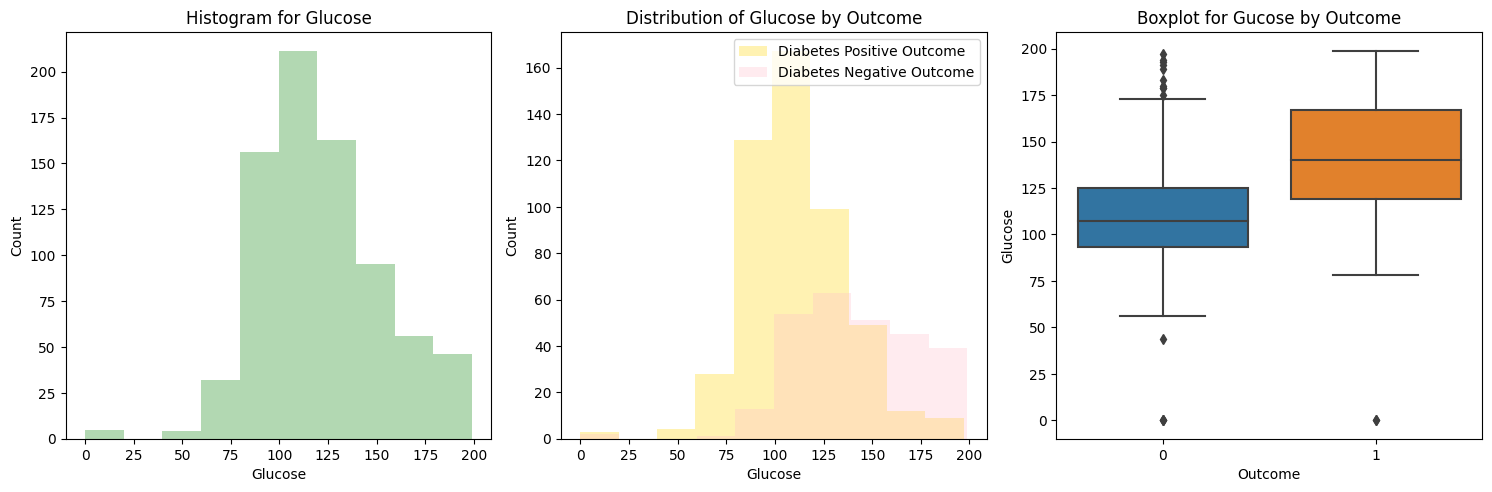

In [13]:
# Data visualization for Glucose
fig,axs=plt.subplots(1,3, figsize=(15,5))

# 1st for histogram
axs[0].hist(df['Glucose'],color='green',alpha=0.3)
axs[0].set_title('Histogram for Glucose')
axs[0].set_xlabel('Glucose')
axs[0].set_ylabel('Count')

# 2nd for histogram segmented by Outcome
axs[1].hist(df[df['Outcome'] == 0]['Glucose'], color='Gold', alpha=0.3, label='Diabetes Positive Outcome')
axs[1].hist(df[df['Outcome'] == 1]['Glucose'], color='pink', alpha=0.3, label='Diabetes Negative Outcome')
axs[1].set_title('Distribution of Glucose by Outcome')
axs[1].set_xlabel('Glucose')
axs[1].set_ylabel('Count')
axs[1].legend()

# 3rd for representing same segmentation using boxplot
sns.boxplot(data=df, y='Glucose', x='Outcome', ax=axs[2])
axs[2].set_title('Boxplot for Gucose by Outcome')
axs[2].set_xlabel('Outcome')
axs[2].set_ylabel('Glucose')

fig.tight_layout(pad=1.0)
plt.show()

- 1st graph show data left skewed
- 2nd graph shows high level of glucose among diabetic positive groups
- 3rd Graph shows dats has come outliers

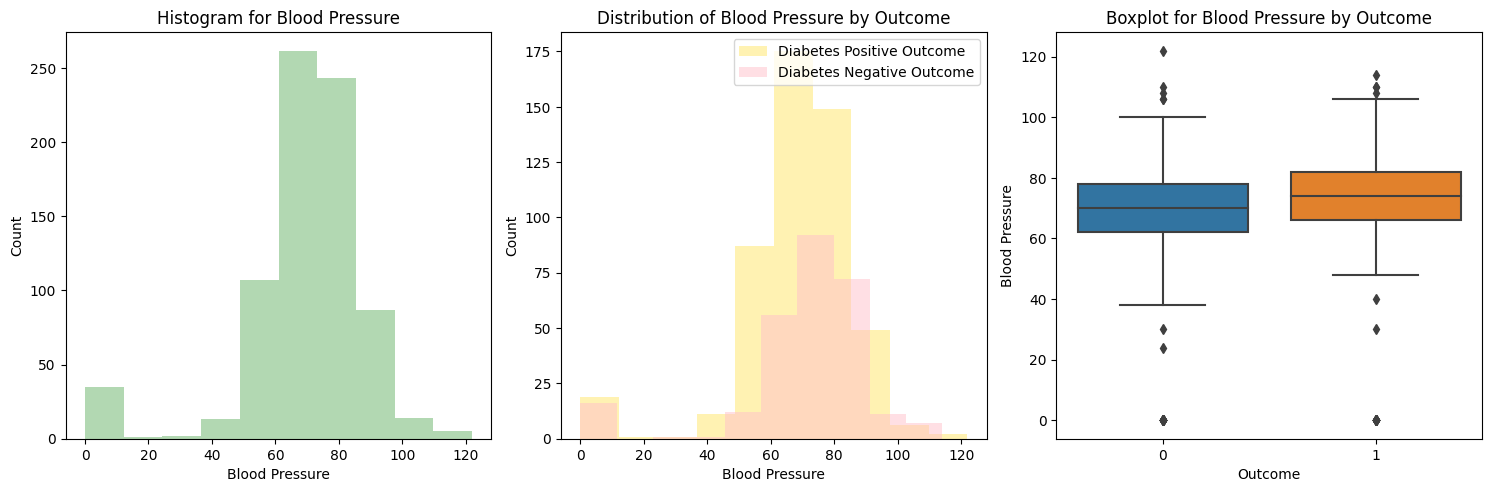

In [14]:
# Data visualization for Blood Pressure
fig,axs=plt.subplots(1,3,figsize=(15,5))

#1st Histogram
axs[0].hist(df['BloodPressure'],color='green', alpha=0.3)
axs[0].set_title('Histogram for Blood Pressure')
axs[0].set_xlabel('Blood Pressure')
axs[0].set_ylabel('Count')

# 2nd for histogram segmented by Outcome
axs[1].hist(df[df['Outcome'] == 0]['BloodPressure'], color='Gold', alpha=0.3, label='Diabetes Positive Outcome')
axs[1].hist(df[df['Outcome'] == 1]['BloodPressure'], color='pink', alpha=0.5, label='Diabetes Negative Outcome')
axs[1].set_title('Distribution of Blood Pressure by Outcome')
axs[1].set_xlabel('Blood Pressure')
axs[1].set_ylabel('Count')
axs[1].legend()

# 3rd for representing same segmentation using boxplot
sns.boxplot(data=df, y='BloodPressure', x='Outcome', ax=axs[2])
axs[2].set_title('Boxplot for Blood Pressure by Outcome')
axs[2].set_xlabel('Outcome')
axs[2].set_ylabel('Blood Pressure')
fig.tight_layout(pad=1.0)
plt.show()

- 1st graph show data left skewed
- 2nd graph shows high level of Blood Pressure among diabetic positive groups
- 3rd Graph shows dats has come outliers

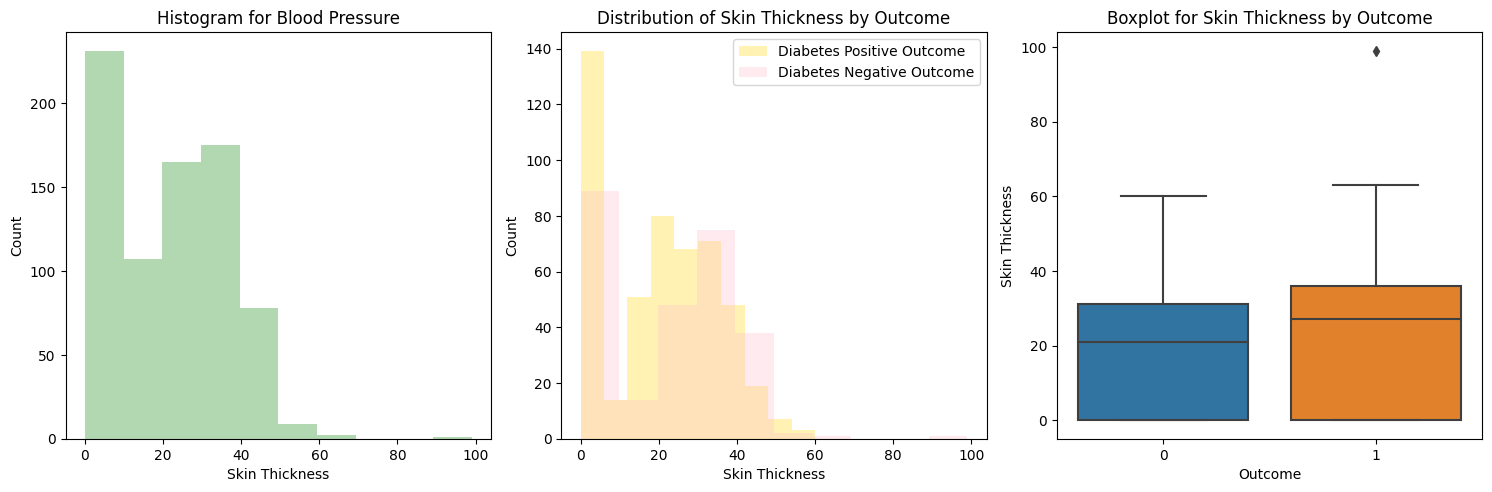

In [15]:
# Data visualization for Skin Thickness
fig,axs=plt.subplots(1,3,figsize=(15,5))

#1st Histogram
axs[0].hist(df['SkinThickness'],color='green', alpha=0.3)
axs[0].set_title('Histogram for Blood Pressure')
axs[0].set_xlabel('Skin Thickness')
axs[0].set_ylabel('Count')

# 2nd for histogram segmented by Outcome
axs[1].hist(df[df['Outcome'] == 0]['SkinThickness'], color='Gold', alpha=0.3, label='Diabetes Positive Outcome')
axs[1].hist(df[df['Outcome'] == 1]['SkinThickness'], color='pink', alpha=0.3, label='Diabetes Negative Outcome')
axs[1].set_title('Distribution of Skin Thickness by Outcome')
axs[1].set_xlabel('Skin Thickness')
axs[1].set_ylabel('Count')
axs[1].legend()

# 3rd for representing same segmentation using boxplot
sns.boxplot(data=df, y='SkinThickness', x='Outcome', ax=axs[2])
axs[2].set_title('Boxplot for Skin Thickness by Outcome')
axs[2].set_xlabel('Outcome')
axs[2].set_ylabel('Skin Thickness')
fig.tight_layout(pad=1.0)
plt.show()

- 1st graph show data right skewed
- 2nd graph shows high level of Skin thickness among diabetic positive groups
- 3rd Graph shows data has some outliers

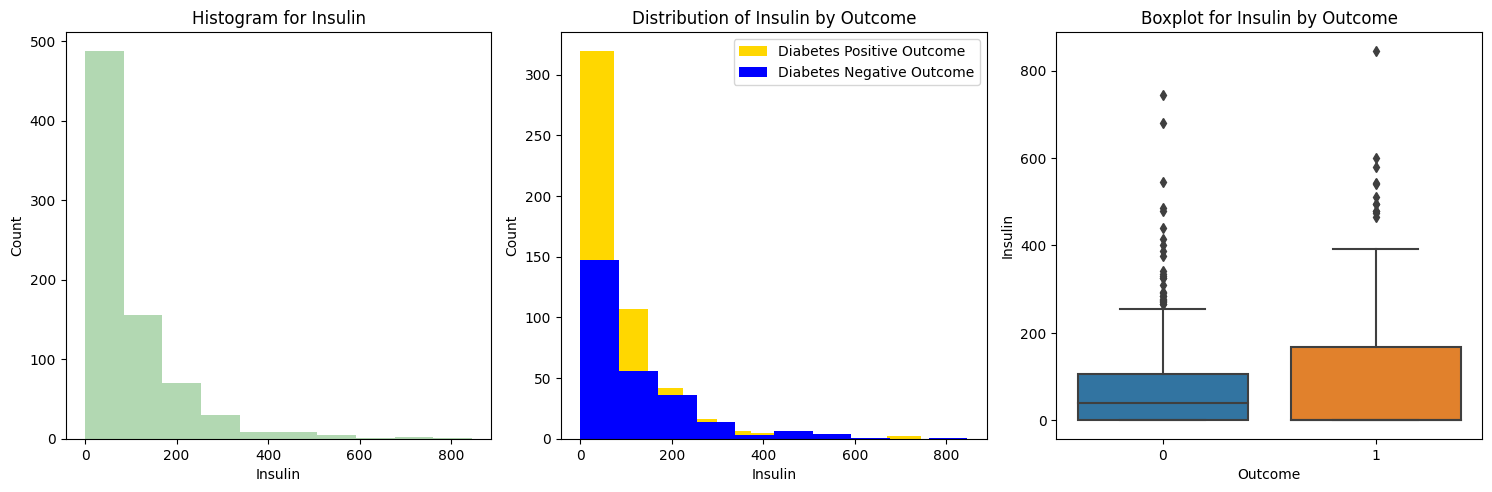

In [16]:
# Data visualization for Insulin
fig,axs=plt.subplots(1,3,figsize=(15,5))

#1st Histogram
axs[0].hist(df['Insulin'],color='green', alpha=0.3)
axs[0].set_title('Histogram for Insulin')
axs[0].set_xlabel('Insulin')
axs[0].set_ylabel('Count')

# 2nd for histogram segmented by Outcome
axs[1].hist(df[df['Outcome'] == 0]['Insulin'], color='Gold', label='Diabetes Positive Outcome')
axs[1].hist(df[df['Outcome'] == 1]['Insulin'], color='blue', label='Diabetes Negative Outcome')
axs[1].set_title('Distribution of Insulin by Outcome')
axs[1].set_xlabel('Insulin')
axs[1].set_ylabel('Count')
axs[1].legend()

# 3rd for representing same segmentation using boxplot
sns.boxplot(data=df, y='Insulin', x='Outcome', ax=axs[2])
axs[2].set_title('Boxplot for Insulin by Outcome')
axs[2].set_xlabel('Outcome')
axs[2].set_ylabel('Insulin')
fig.tight_layout(pad=1.0)
plt.show()

- 1st graph show data right skewed
- 2nd graph shows high level of Blood Pressure among diabetic positive groups
- 3rd Graph shows dats has some outliers

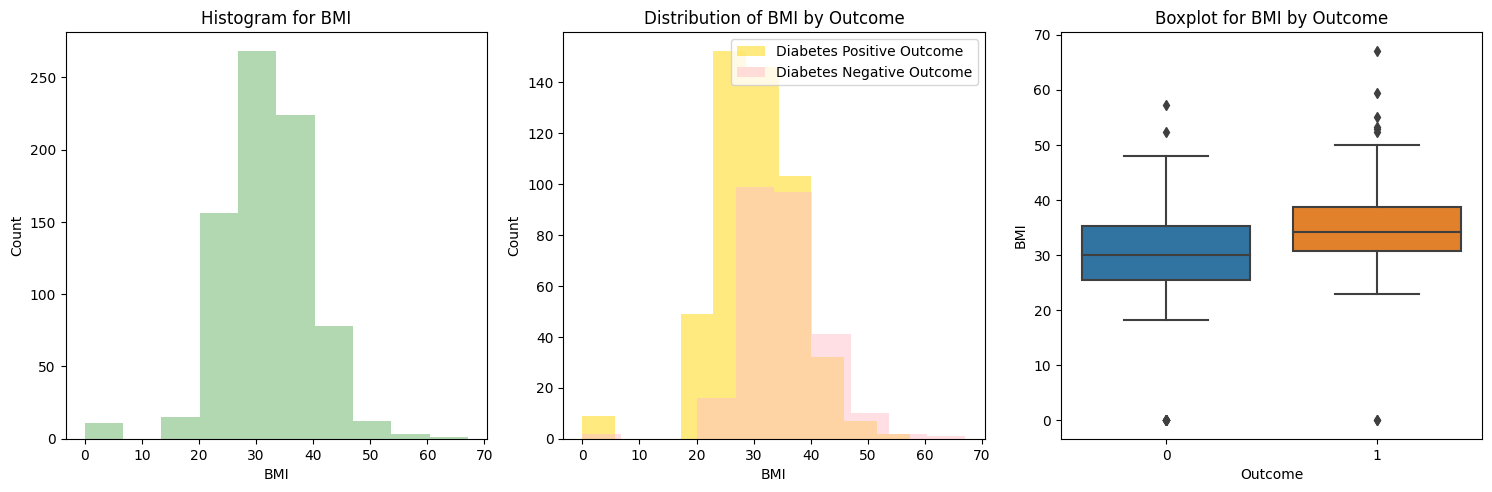

In [17]:
# Visuaization for BMI
fig,axs=plt.subplots(1,3,figsize=(15,5))
# 1st histogram
axs[0].hist(df['BMI'],color='green', alpha=0.3)
axs[0].set_title('Histogram for BMI')
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Count')

# 2nd for histogram segmented by Outcome
axs[1].hist(df[df['Outcome'] == 0]['BMI'], color='Gold', alpha=0.5,label='Diabetes Positive Outcome')
axs[1].hist(df[df['Outcome'] == 1]['BMI'], color='pink',alpha=0.5,  label='Diabetes Negative Outcome')
axs[1].set_title('Distribution of BMI by Outcome')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Count')
axs[1].legend()

# 3rd for representing same segmentation using boxplot
sns.boxplot(data=df, y='BMI', x='Outcome', ax=axs[2])
axs[2].set_title('Boxplot for BMI by Outcome')
axs[2].set_xlabel('Outcome')
axs[2].set_ylabel('BMI')
fig.tight_layout(pad=1.0)
plt.show()

- 1st graph show bell curve
- 2nd graph shows high level of BMI among diabetic positive groups
- 3rd Graph shows dats has some outliers

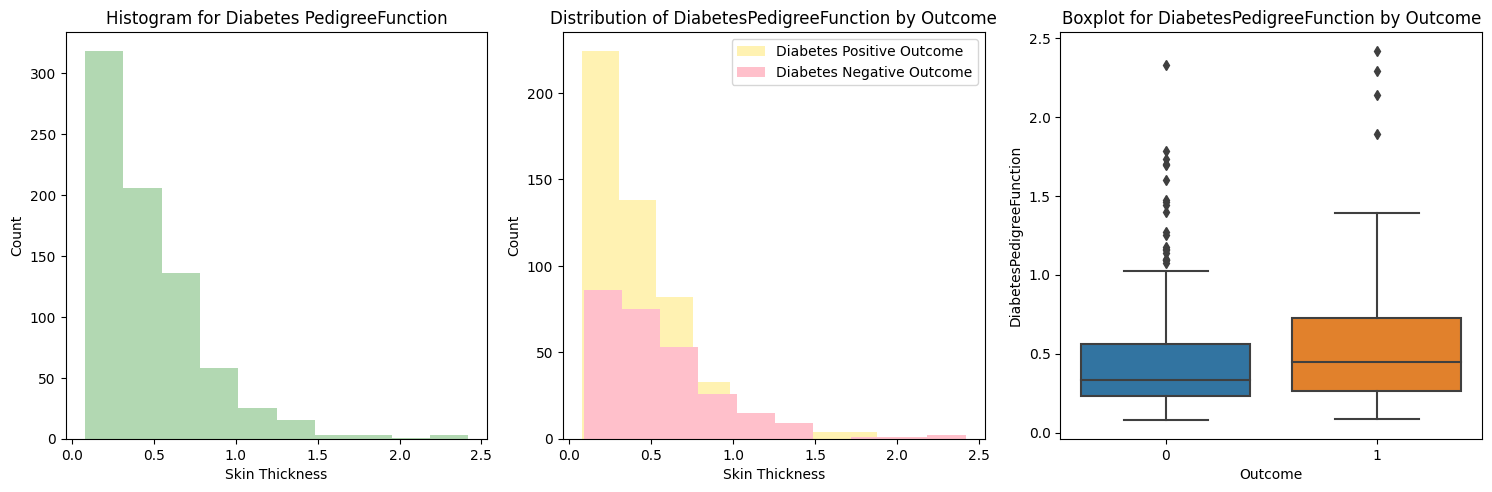

In [18]:
# Data visualization for DiabetesPedigreeFunction
fig,axs=plt.subplots(1,3,figsize=(15,5))

#1st Histogram
axs[0].hist(df['DiabetesPedigreeFunction'],color='green', alpha=0.3)
axs[0].set_title('Histogram for Diabetes PedigreeFunction')
axs[0].set_xlabel('Skin Thickness')
axs[0].set_ylabel('Count')

# 2nd for histogram segmented by Outcome
axs[1].hist(df[df['Outcome'] == 0]['DiabetesPedigreeFunction'], color='Gold', alpha=0.3, label='Diabetes Positive Outcome')
axs[1].hist(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'], color='pink', label='Diabetes Negative Outcome')
axs[1].set_title('Distribution of DiabetesPedigreeFunction by Outcome')
axs[1].set_xlabel('Skin Thickness')
axs[1].set_ylabel('Count')
axs[1].legend()

# 3rd for representing same segmentation using boxplot
sns.boxplot(data=df, y='DiabetesPedigreeFunction', x='Outcome', ax=axs[2])
axs[2].set_title('Boxplot for DiabetesPedigreeFunction by Outcome')
axs[2].set_xlabel('Outcome')
axs[2].set_ylabel('DiabetesPedigreeFunction')
fig.tight_layout(pad=1.0)
plt.show()

- 1st graph shows data righ skewed
- 2nd graph shows high level of Skin thickness higher among diabetic positive groups
- 3rd Graph shows dats has some outliers

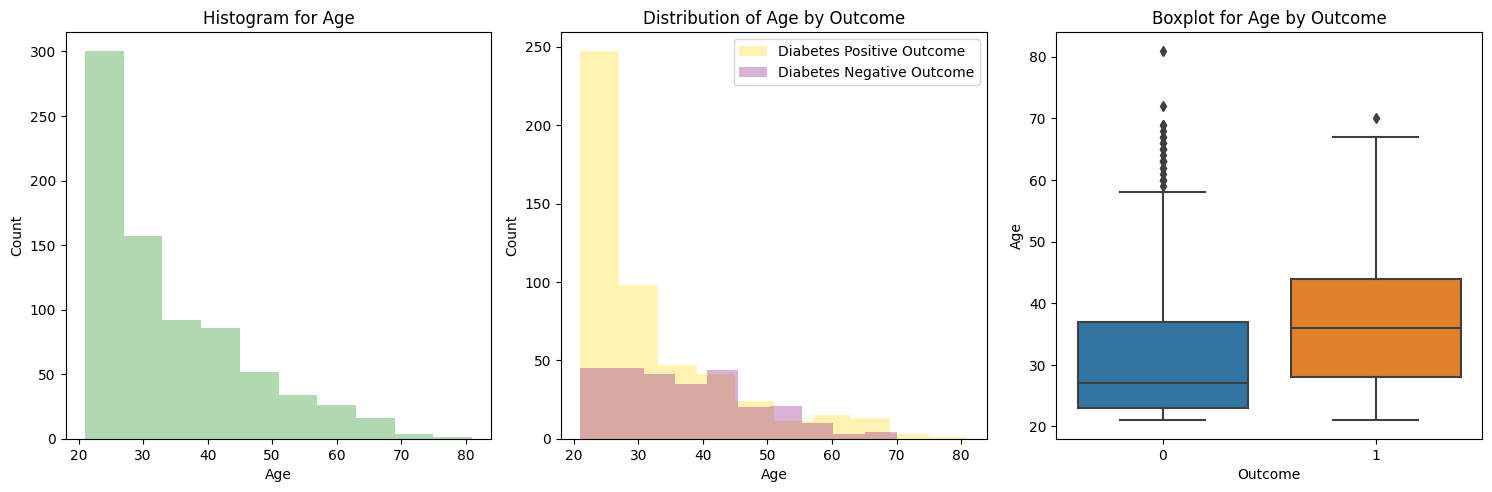

In [19]:
# Data visualization for AGE
fig,axs=plt.subplots(1,3,figsize=(15,5))

#1st Histogram
axs[0].hist(df['Age'],color='green', alpha=0.3)
axs[0].set_title('Histogram for Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')

# 2nd for histogram segmented by Outcome
axs[1].hist(df[df['Outcome'] == 0]['Age'], color='Gold', alpha=0.3, label='Diabetes Positive Outcome')
axs[1].hist(df[df['Outcome'] == 1]['Age'], color='purple', alpha=0.3, label='Diabetes Negative Outcome')
axs[1].set_title('Distribution of Age by Outcome')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Count')
axs[1].legend()

# 3rd for representing same segmentation using boxplot
sns.boxplot(data=df, y='Age', x='Outcome', ax=axs[2])
axs[2].set_title('Boxplot for Age by Outcome')
axs[2].set_xlabel('Outcome')
axs[2].set_ylabel('Age')
fig.tight_layout(pad=1.0)
plt.show()

- 1st graph shows data righ skewed
- 2nd graph shows high level of Age higher among diabetic positive groups
- 3rd Graph shows dats has some outliers

# Data Cleaning
-Include identification of:
- Missing values
- Replace missing values
- Identify duplicates
- Remove duplicates
- Identify outlier
- Handle outliers

In [20]:
# Missing values
df.isnull().sum(), df.isnull().sum().sum()/len(df)*100


(Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
 0.0)

In [21]:
#Identify duplicates
df.duplicated().sum()

0

In [22]:
# Identify Outliers
# Define continuous features
continous_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each continuous feature
Q1 = df[continous_features].quantile(0.25)
Q3 = df[continous_features].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the minimum and maximum range for outliers
min_range = Q1 - 1.5 * IQR
max_range = Q3 + 1.5 * IQR

# Count the number of outliers for each continuous feature
outliers_count_specified = ((df[continous_features] < min_range) | (df[continous_features] > max_range)).sum()

# Display the count of outliers for each continuous feature
outliers_count_specified

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
dtype: int64

In [23]:
# to remove outliers filter data below  max range
df = df.loc[df[continous_features[0]] <= max_range[0]]


In [24]:
#Onehotencoding
df_dummies=pd.get_dummies(df,columns=['Outcome'],drop_first=True)
df_dummies


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_1
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


# Normality Testing 

In [25]:
import pandas as pd
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for each column
df1 = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
shapiro_results = []
normal_columns = []

for column in df1.columns:
    if column != 'Outcome':
        stat, p = shapiro(df1[column])
        print(f"Column: {column}")
        print(f"Statistics: {stat:.3f}, p-value: {p:.3f}")

        alpha = 0.05
        is_normal = p > alpha
        if is_normal:
            print("Data is normally distributed")
            normal_columns.append(column)
        else:
            print("Data does not follow Normal Distribution")

Column: Pregnancies
Statistics: 0.906, p-value: 0.000
Data does not follow Normal Distribution
Column: Glucose
Statistics: 0.970, p-value: 0.000
Data does not follow Normal Distribution
Column: BloodPressure
Statistics: 0.819, p-value: 0.000
Data does not follow Normal Distribution
Column: SkinThickness
Statistics: 0.904, p-value: 0.000
Data does not follow Normal Distribution
Column: Insulin
Statistics: 0.721, p-value: 0.000
Data does not follow Normal Distribution
Column: BMI
Statistics: 0.950, p-value: 0.000
Data does not follow Normal Distribution
Column: DiabetesPedigreeFunction
Statistics: 0.836, p-value: 0.000
Data does not follow Normal Distribution
Column: Age
Statistics: 0.873, p-value: 0.000
Data does not follow Normal Distribution


In [26]:
# Append the results to the list
shapiro_results.append({
            'Column': column,
            'Statistics': stat,
            'p-value': p,
            'Normal Distribution': is_normal
        })

# Create a DataFrame from the results
shapiro_df = pd.DataFrame(shapiro_results)

# Display the table
print(shapiro_df)

  Column  Statistics       p-value  Normal Distribution
0    Age    0.872709  1.840318e-24                False


# Linear Relationship
- Assis by pairplot
- Assis by correlation

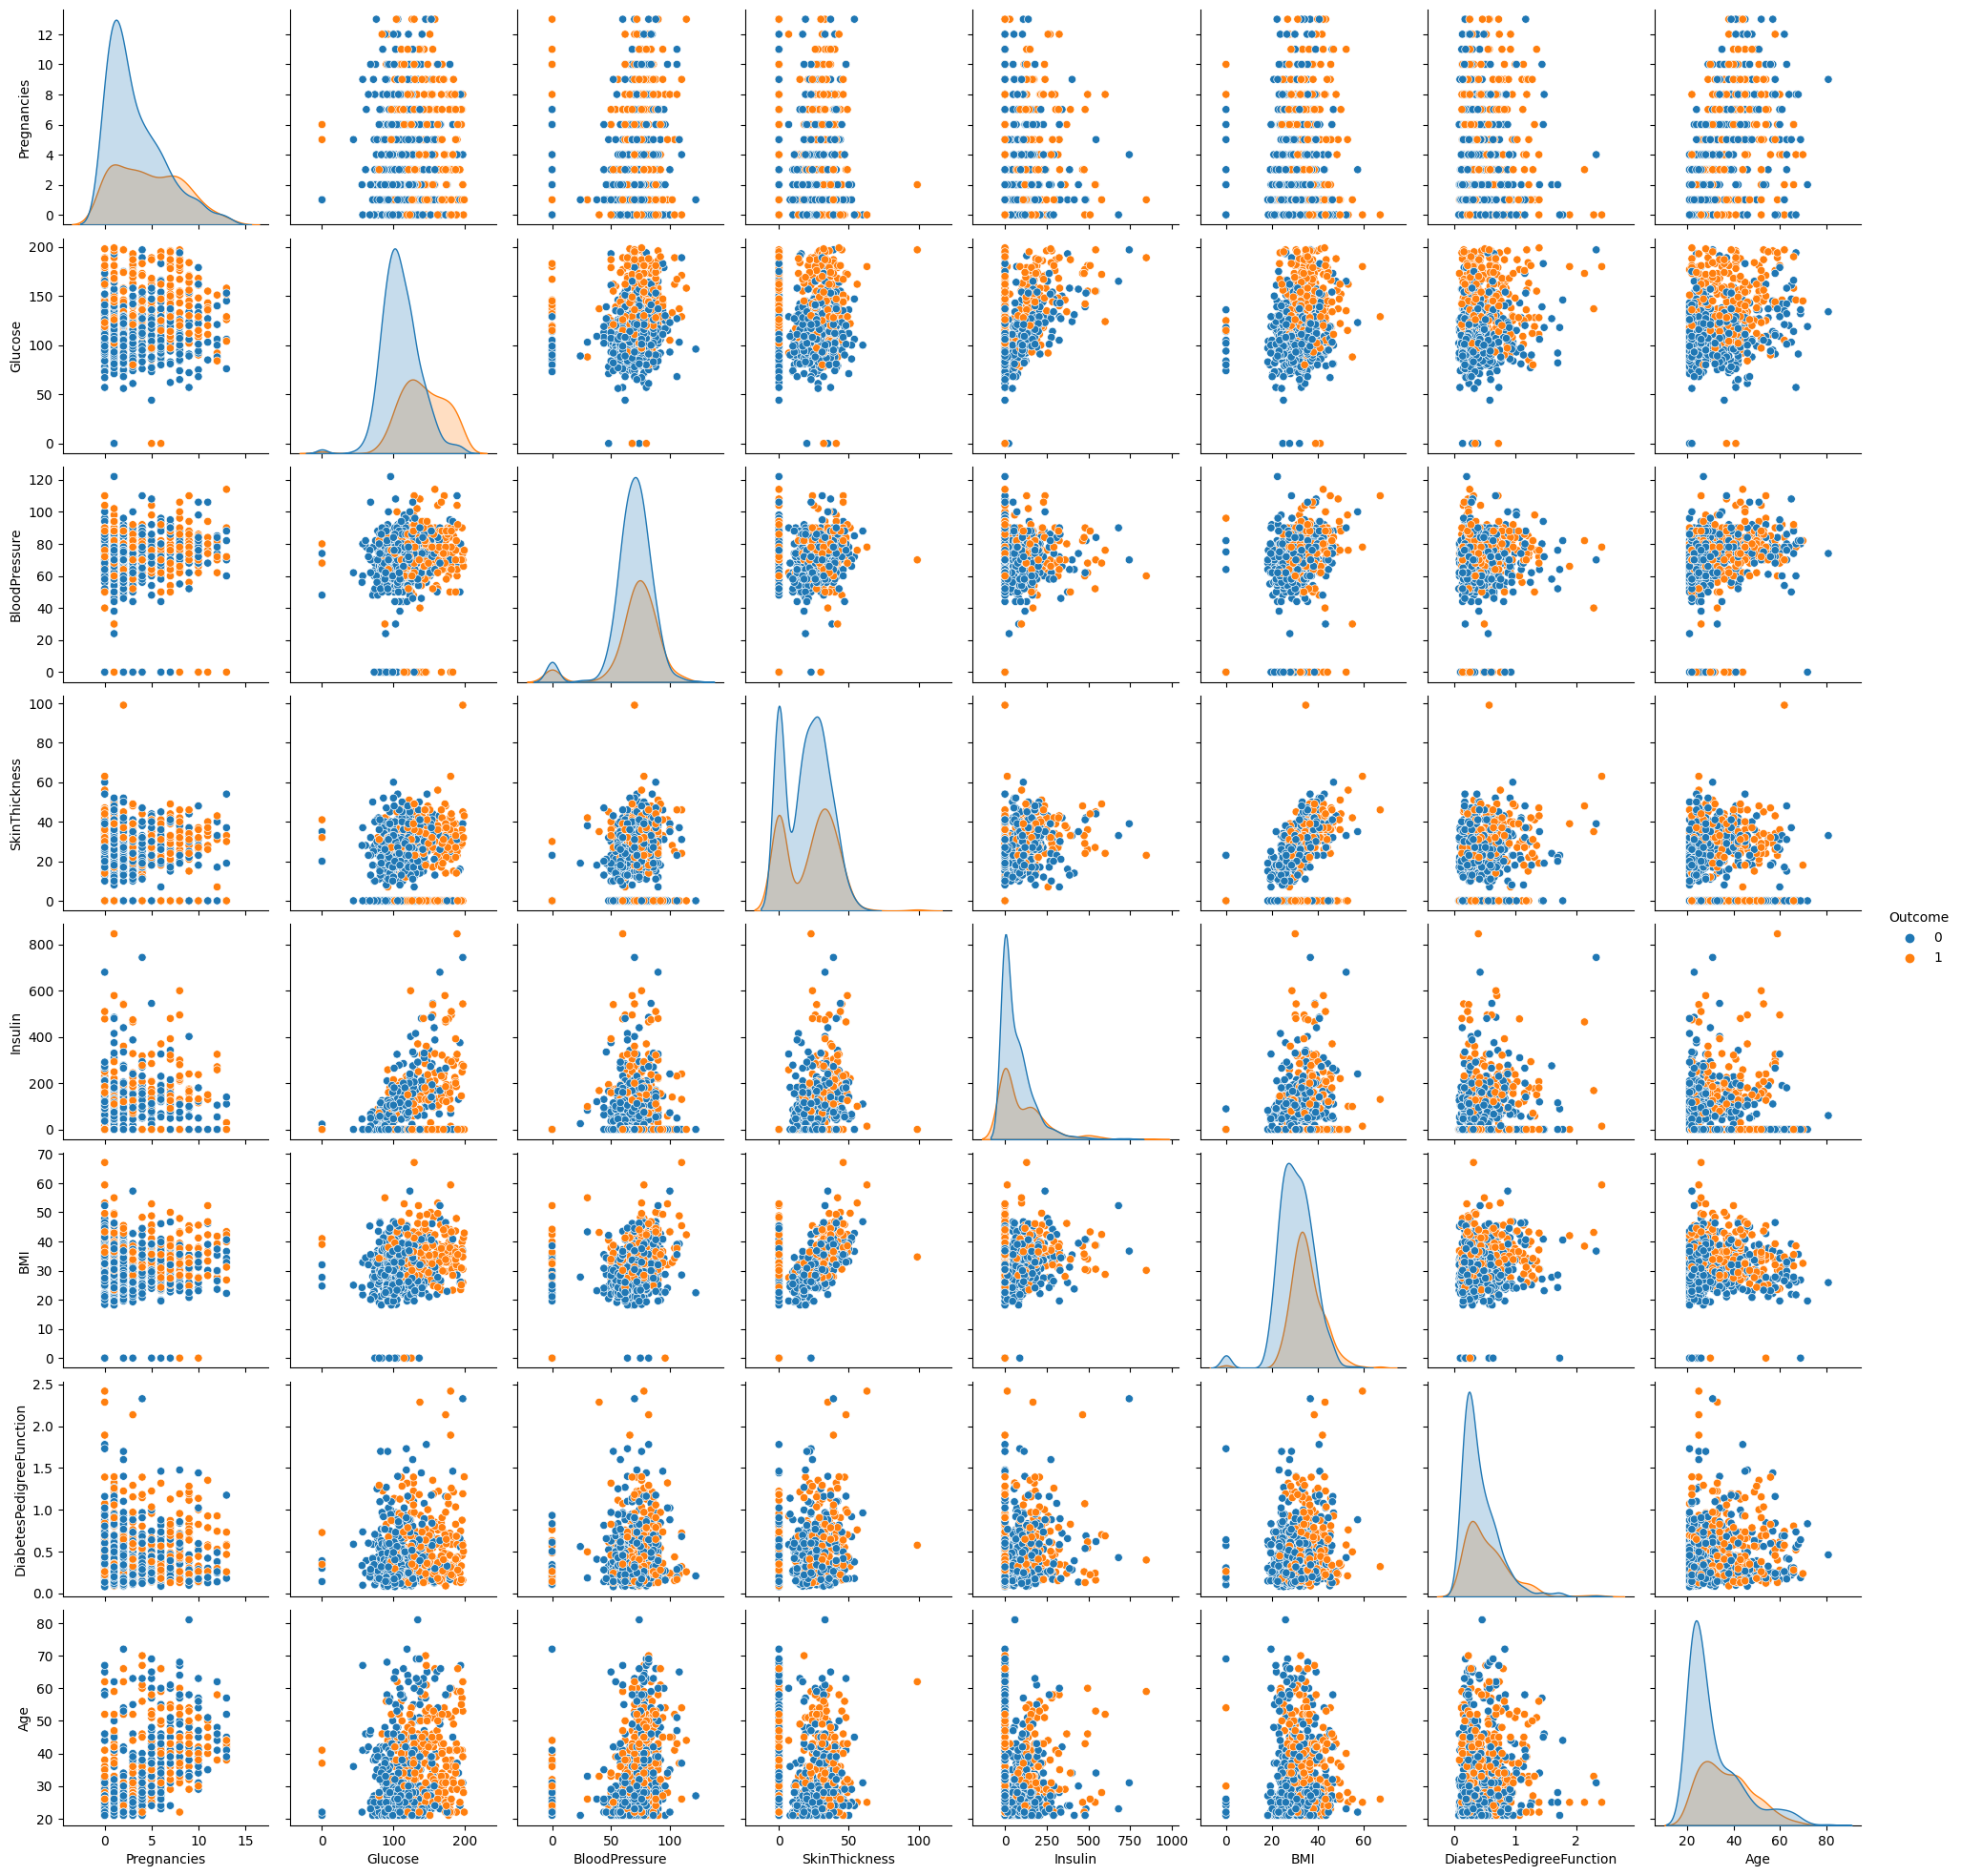

In [27]:
sns.pairplot(df, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")

- Positive relationship exist among Skin thickness, Insulin, Blood Pressure and Age
- no non linear relationship exist
- Further relationship will be assis by correlation analaysis and heatmap 

In [28]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120529,0.144242,-0.097847,-0.079443,0.006171,-0.031852,0.546169,0.205240
Glucose,0.120529,1.000000,0.154071,0.053875,0.334445,0.219821,0.138437,0.262493,0.465391
BloodPressure,0.144242,0.154071,1.000000,0.207595,0.088091,0.281744,0.040934,0.239383,0.064886
SkinThickness,-0.097847,0.053875,0.207595,1.000000,0.437400,0.390889,0.184397,-0.117893,0.070071
Insulin,-0.079443,0.334445,0.088091,0.437400,1.000000,0.197148,0.184999,-0.043957,0.129928
BMI,0.006171,0.219821,0.281744,0.390889,0.197148,1.000000,0.140711,0.032986,0.289917
DiabetesPedigreeFunction,-0.031852,0.138437,0.040934,0.184397,0.184999,0.140711,1.000000,0.033822,0.176598
Age,0.546169,0.262493,0.239383,-0.117893,-0.043957,0.032986,0.033822,1.000000,0.233776
Outcome,0.205240,0.465391,0.064886,0.070071,0.129928,0.289917,0.176598,0.233776,1.000000


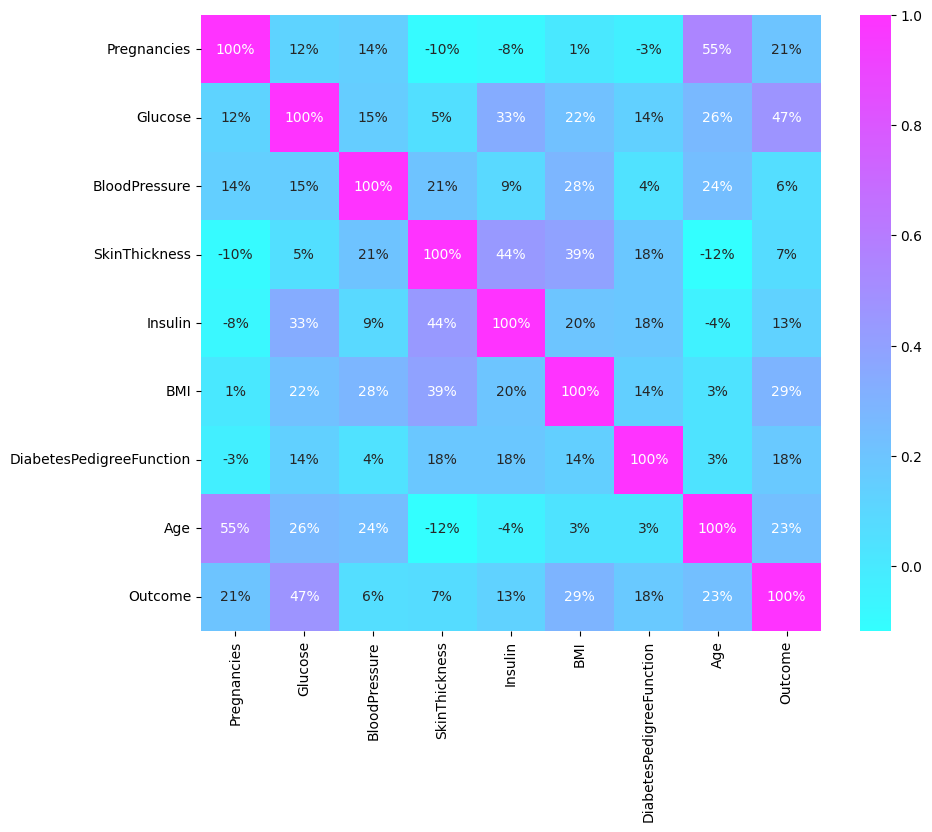

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='cool', fmt='.0%',alpha=0.8)
plt.show()


Moderate correlation exist among Age,BMI, Skin thickness, Glucose ranging r value of 0.5-0.6

# Machine Learning
- KNN
- Logistic Regression
- Decision Tree
- Random Forest Classifier
- Gradient Boost
- Support Vector

In [30]:
cols = ["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X = df[cols]
y = df.Outcome

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'],df['Outcome'], stratify = df['Outcome'], random_state=66)

KNN neighbour Classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

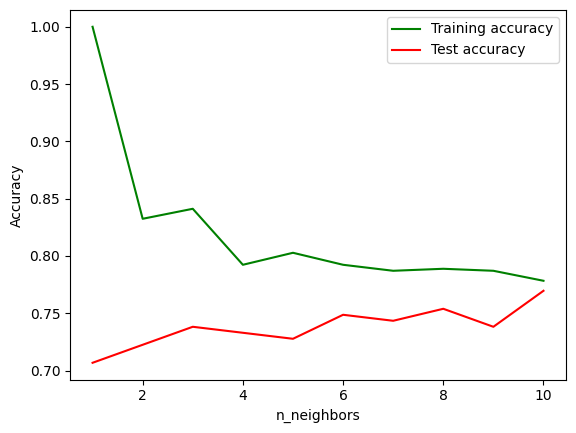

In [32]:
# Draw Plot for Training data Accuracy and test Data Accuracy
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy",color = "green")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy",color = "r")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [33]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.74


In [34]:
# logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.782
Test set accuracy: 0.775


In [35]:
logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.780
Test set accuracy: 0.759


In [36]:
logreg100 = LogisticRegression(C = 100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test))) 

Training set accuracy: 0.782
Test set accuracy: 0.770


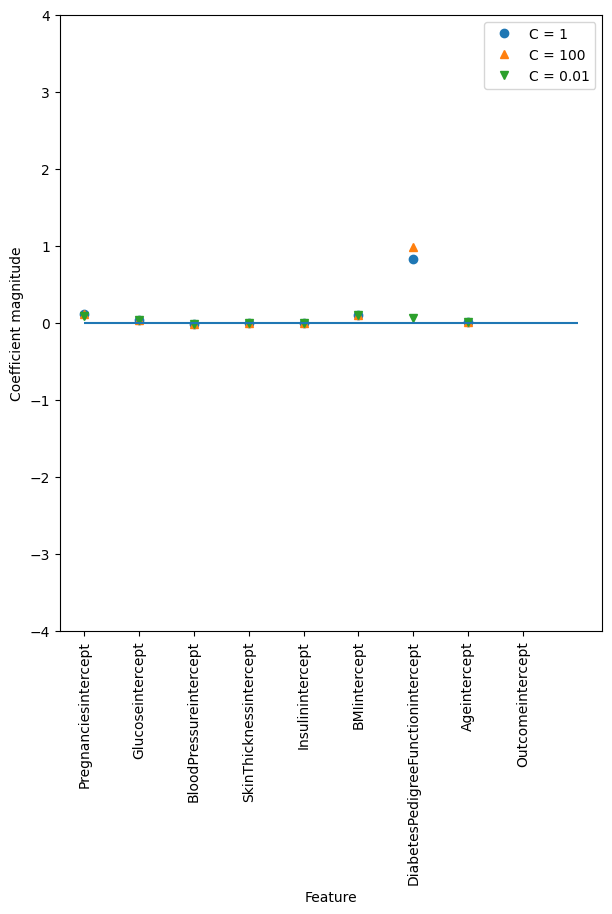

In [37]:
# Draw a Plot to find more diabetic features in a person
diabetes_data_features = [x for i,x in enumerate(df.columns) if i!=9]

plt.figure(figsize=(7,8))
plt.plot(logreg.coef_.T, 'o', label="C = 1")
plt.plot(logreg100.coef_.T, '^', label="C = 100")
plt.plot(logreg001.coef_.T, 'v', label="C = 0.01")
plt.xticks(range(df.shape[1]), df.columns + ['intercept'], rotation=90)
plt.hlines(0, 0, df.shape[1])
plt.ylim(-4, 4)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

In [38]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.691


In [39]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.787
Accuracy on test set: 0.707


In [40]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.51634038 0.         0.         0.         0.31727905
 0.02362747 0.1427531 ]


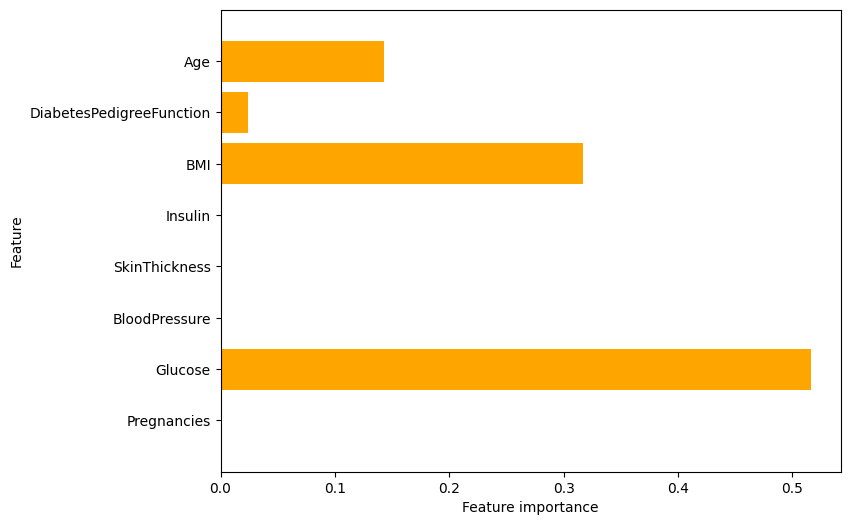

In [41]:
# Visualization of decision tree
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center', color="orange")
    plt.yticks(np.arange(n_features), diabetes_data_features[:n_features])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.723


In [43]:
rf1 = RandomForestClassifier(max_depth = 3, n_estimators = 100, random_state = 0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.796
Accuracy on test set: 0.717


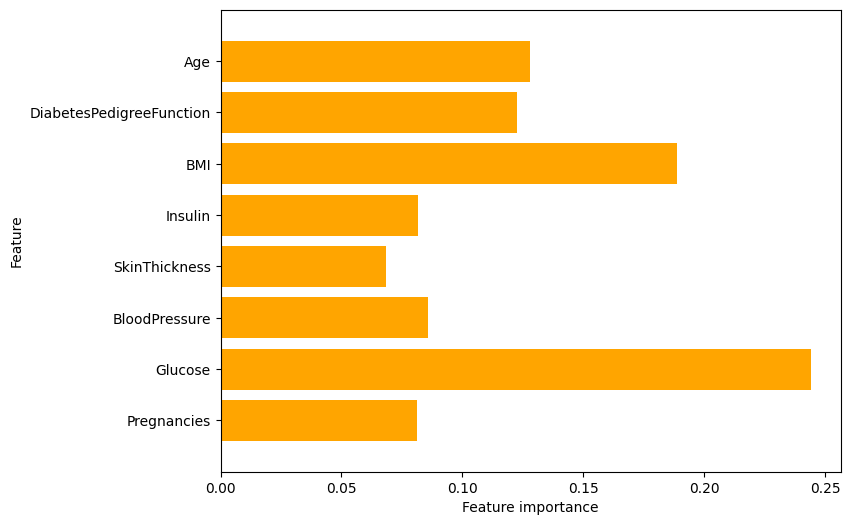

In [44]:
plot_feature_importances_diabetes(rf)
plt.savefig('feature_importance')

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.941
Accuracy on test set: 0.723


In [46]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.801
Accuracy on test set: 0.743


In [47]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.805
Accuracy on test set: 0.691


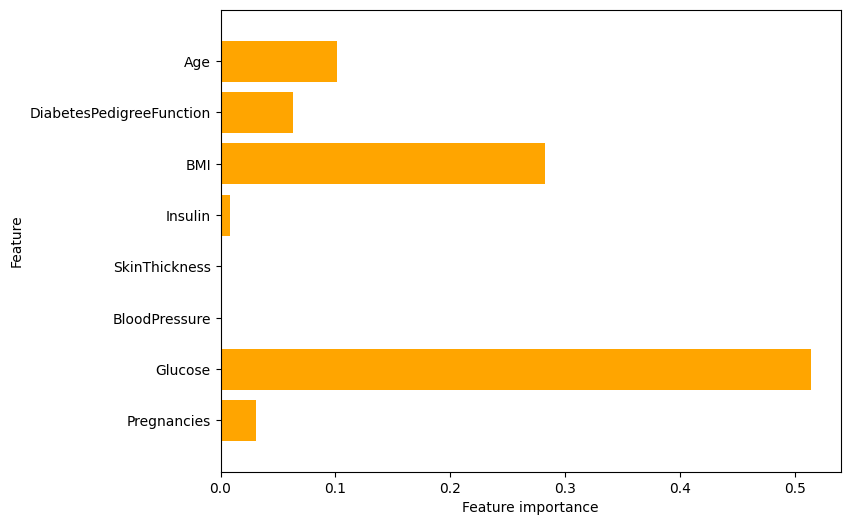

In [48]:
# **Now Lets visualize  the feature importances

plot_feature_importances_diabetes(gb1)
plt.savefig('feature_importance')

In [49]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.74


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.81
Accuracy on test set: 0.76


In [51]:
# Lets Try to increasing C and check the result.
svc = SVC(C = 1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.956
Accuracy on test set: 0.691


In [52]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.71


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.822
Accuracy on test set: 0.791


Logistic Regression Accuracy: 74.4400
SVC Accuracy: 74.1100
Decision Tree Accuracy: 65.2800
Random Forest Accuracy: 73.2200
K nearest Neighbour:74.4000
Gradient Boost Accuracy:72.3000


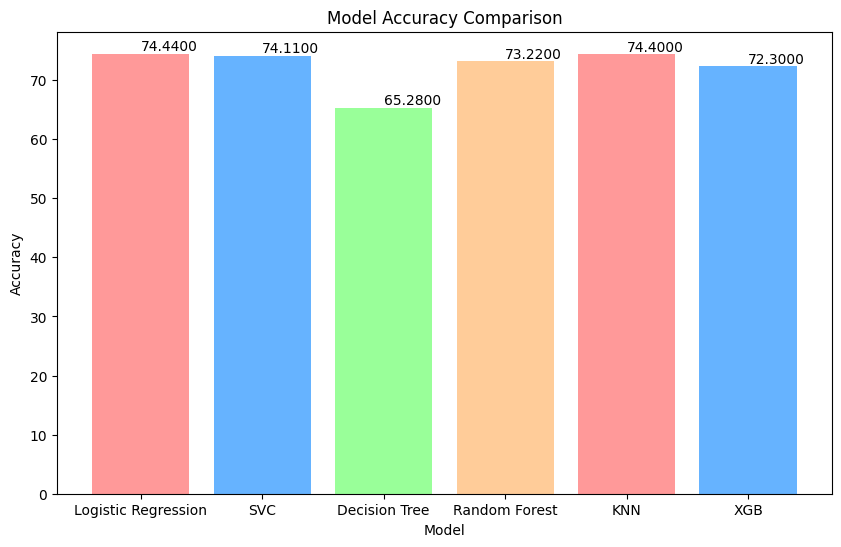

In [54]:
import matplotlib.pyplot as plt

# Define the accuracy scores
accuracy_log_reg = 0.7444*100
accuracy_svc = 0.7411*100
accuracy_dt = 0.6528*100
accuracy_rf = 0.7322*100
accuracy_knn= 0.744*100
accuracy_XGB= 0.723*100

# Print the accuracy scores
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"SVC Accuracy: {accuracy_svc:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"K nearest Neighbour:{accuracy_knn:.4f}")
print(f"Gradient Boost Accuracy:{accuracy_XGB:.4f}")

# Define the accuracy scores in a dictionary
accuracies = {
    'Logistic Regression': accuracy_log_reg,
    'SVC': accuracy_svc,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'KNN':accuracy_knn,
    'XGB':accuracy_XGB
}

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom')  # va: vertical alignment

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the plot
plt.show()